# 插值 Interpolation

xyfJASON

## 1 插值方法



### 1.1 分段线性插值

相邻两个点用直线连起来，得到的折线就是分段线性插值函数。



### 1.2 Lagrange 插值

$$
L_n(x)=\sum_{i=0}^ny_il_i(x)=\sum_{i=0}^n y_i\prod_{\begin{align}&j=0\\&j\neq i\end{align}}^n\frac{x-x_j}{x_i-x_j}
$$



### 1.3 样条插值

设区间 $[a,b]$ 被分划为若干小区间：$\Delta: a=x_0<x_1<\cdots<x_{n-1}<x_n=b$，若函数 $S(x)$ 满足：

1. 在每个小区间 $[x_i,x_{i+1}]$ 上 $S(x)$ 是 $m$ 次多项式
2. 在区间 $[a,b]$ 上 $S(x)$ 有 $m-1$ 阶连续导数

则称 $S(x)$ 为关于分划 $\Delta$ 的 $m$ 次样条函数，其图形为 $m$ 次样条曲线。

- 零次样条插值：即取最近的上一个插值点

- 一次样条插值：即分段线性插值

- 三次样条插值：

  共 $4n$ 个参数，$2n+(n-1)+(n-1)=4n-2$ 个约束条件，因此还需要添加两个边界条件：

  1. $S'(a)=y'_0,\,S'(b)=y'_n$。添加这种边界条件得到的插值函数称为**完备三次样条插值函数**。

     如果不知道 $y'_0,y'_n$，可以用 $x_0,x_1,x_2,x_3$ 作一个 Lagrange 插值，令 $S'(a)=L_3'(a)$；同理，用 $x_n,x_{n-1},x_{n-2},x_{n-3}$ 作一个 Lagrange 插值，令 $S'(b)=L_3'(b)$。这样建立的三次样条插值函数称为 **Lagrange 三次样条插值函数**。

  2. $S''(a)=y''_0,\,S''(b)=y''_n$。特别地，当 $y''_0=y''_n=0$ 时称为**自然边界条件**。

  3. $S'_+(a)=S'_-(b),\,S''_+(a)=S''_-(b)$，称为**周期条件**。



## 2 代码

插值可调用 `scipy.interpolate`。

Documentation: https://docs.scipy.org/doc/scipy/reference/interpolate.html



### 2.1 一元函数插值

`scipy.interpolate.interp1d`，提供以下方法：

- linear：分段线性
- nearest：最近邻插值
- nearest-up：最近邻插值
- zero：零次样条插值
- slinear：一次样条插值
- quadratic：二次样条插值
- cubic：三次样条插值
- previous：用上一个插值点
- next：用下一个插值点
- 整数 $n$：$n$ 次样条插值



特别地，三次样条插值有一个专门的接口：`scipy.interpolate.CubicSpline`，其中 `bc_type` 参数可以让我们选择边界条件：

- 'not-a-knot'：非纽结条件，默认
- 'periodic'：周期条件
- 'clamped'：端点一阶导为零
- 'natural'：自然条件，端点二阶导为零
- 两个元组 (order, deriv_values)：分别表示两个端点的第 order 阶导为 deriv_values



Lagrange 插值：`scipy.interpolate.lagrange`，返回 Lagrange 插值多项式。



### 2.2 多元函数插值

多元函数：`scipy.interpolate.griddata`，可选线性、最近邻、三次样条插值。

> 特别注意：使用三次样条插值时会存在不确定性点，需要将它们换成最近邻插值的结果，详见例题。

二元格点函数，推荐用 `scipy.interpolate.RectBivariateSpline`，可选样条插值的次数。

多元格点函数，`scipy.interpolate.RegularGridInterpolator`，可选线性插值或最近邻插值。

## 3 例题



### 3.1 例一

取 $x=0,1,\ldots,9$，$y=\sin(3x)$ 作为插值点，代码如下：

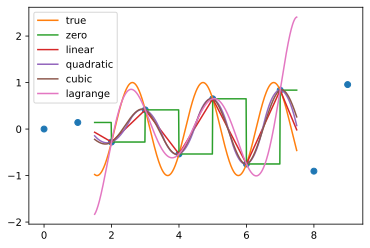

In [1]:
import numpy as np
from scipy.interpolate import *
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'


x = np.arange(0, 10)
y = np.sin(x * 3)

Zero = interp1d(x, y, kind='zero')
Linear = interp1d(x, y, kind='linear')
Quadratic = interp1d(x, y, kind='quadratic')
Cubic = interp1d(x, y, kind='cubic')
Lagrange = lagrange(x, y)

x_pred = np.arange(1.5, 7.5, 0.01)
y_true = np.sin(x_pred * 3)
y_zero = Zero(x_pred)
y_linear = Linear(x_pred)
y_quadratic = Quadratic(x_pred)
y_cubic = Cubic(x_pred)
y_lagrange = Lagrange(x_pred)

fig, ax = plt.subplots(1)
ax.plot(x, y, 'o')
ax.plot(x_pred, y_true, label='true')
ax.plot(x_pred, y_zero, label='zero')
ax.plot(x_pred, y_linear, label='linear')
ax.plot(x_pred, y_quadratic, label='quadratic')
ax.plot(x_pred, y_cubic, label='cubic')
ax.plot(x_pred, y_lagrange, label='lagrange')
plt.legend()
plt.show()

### 3.2 例二

已知某地带高程如下：

|      | 100  | 200  | 300  | 400  | 500  |
| ---- | ---- | ---- | ---- | ---- | ---- |
| 100  | 636  | 697  | 624  | 478  | 450  |
| 200  | 698  | 712  | 630  | 478  | 420  |
| 300  | 680  | 674  | 598  | 412  | 400  |
| 400  | 662  | 626  | 552  | 334  | 310  |

这是一个网格数据，可以用 `RectBivariateSpline` 插值，代码如下：

max position: 170 170
max value: 719.6752


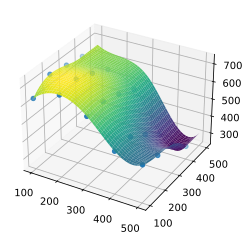

In [2]:
x = np.array([100, 200, 300, 400, 500])
y = np.array([100, 200, 300, 400])
z = np.array([[636, 698, 680, 662],
              [697, 712, 674, 626],
              [624, 630, 598, 552],
              [478, 478, 412, 334],
              [450, 420, 400, 310]])
rect = RectBivariateSpline(x, y, z, kx=3, ky=3)

x_pred = np.arange(100, 510, 10)
y_pred = np.arange(100, 510, 10)
z_rect = rect(x_pred, y_pred)
pos = np.unravel_index(z_rect.argmax(), z_rect.shape)
print('max position: %d %d' % (x_pred[pos[0]], y_pred[pos[1]]))
print('max value: %.4f' % z_rect[pos[0], pos[1]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
xplot, yplot = np.meshgrid(x_pred, y_pred)
ax.scatter3D(X.flatten(), Y.flatten(), z.transpose().flatten())
ax.plot_surface(xplot, yplot, z_rect.transpose(), cmap='viridis', alpha=0.95)
plt.show()

### 3.3 例三

某处海底深度数据如下：

| x    | 129  | 140   | 103.5 | 88   | 185.5 | 195   | 105  | 157.5 | 107.5 | 77   | 81   | 162   | 162  | 117.5 |
| ---- | ---- | ----- | ----- | ---- | ----- | ----- | ---- | ----- | ----- | ---- | ---- | ----- | ---- | ----- |
| y    | 7.5  | 141.5 | 23    | 147  | 22.5  | 137.5 | 85.5 | -6.5  | -81   | 3    | 56.5 | -66.5 | 84   | -33.5 |
| z    | 4    | 8     | 6     | 8    | 6     | 8     | 8    | 9     | 9     | 8    | 8    | 9     | 4    | 9     |

这不是格点数据，可以用 `griddata` 进行插值，代码如下：

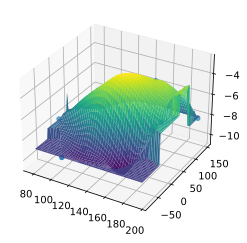

In [3]:
x = np.array([129, 140, 103.5, 88, 185.5, 195, 105, 157.5, 107.5, 77, 81, 162, 162, 117.5])
y = np.array([7.5, 141.5, 23, 147, 22.5, 137.5, 85.5, -6.5, -81, 3, 56.5, -66.5, 84, -33.5])
z = -np.array([4, 8, 6, 8, 6, 8, 8, 9, 9, 8, 8, 9, 4, 9])
x_pred = np.linspace(x.min(), x.max(), 100)
y_pred = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(x_pred, y_pred)
z_cubic = griddata(np.vstack((x, y)).transpose(), z,
                   xi=np.vstack((X.flatten(), Y.flatten())).transpose(),
                   method='cubic')
z_nearest = griddata(np.vstack((x, y)).transpose(), z,
                     xi=np.vstack((X.flatten(), Y.flatten())).transpose(),
                     method='nearest')
z_cubic[np.isnan(z_cubic)] = z_nearest[np.isnan(z_cubic)]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x, y, z)
ax.plot_surface(X, Y, z_cubic.reshape(100, 100), cmap='viridis')
plt.show()